# **Predict Diabetes in Patients by using Machine Learning Techniques**

This classification project focuses on developing a machine learning model to determine whether individuals are diabetic based on health-related data from the Pima Indians Diabetes Dataset (sourced from [Kaggle](https://)). The dataset includes vital medical measurements like blood glucose, BMI, and blood pressure. Since the dataset contains fewer positive diabetes cases compared to non-diabetic ones, special care is taken to address this imbalance. By leveraging best practices of machine learning classification model techniques inclusing resampling and fine-tuning of model parameters, the goal is to enhance prediction accuracy. The outcome aims to contribute to more effective early detection of diabetes and support proactive healthcare measures.

The project follows a structured ML pipeline which include:

1. Data Loading
2. EDA
3. Train/Test split
4. Feature Engineering
5. Modeling
6. Hyperparameter Tuning
7. Selecting Best Model
8. Model interpretation
9. Results
10. Save model
11. Implementation / Testing


## **1. Data Loading**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = '/data/diabetes.csv'
dataset = pd.read_csv(file_path, index_col=False)

In [ ]:
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
593,2,82,52,22,115,28.5,1.699,25,0
94,2,142,82,18,64,24.7,0.761,21,0
177,0,129,110,46,130,67.1,0.319,26,1
501,3,84,72,32,0,37.2,0.267,28,0
295,6,151,62,31,120,35.5,0.692,28,0


**About Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


**Information about dataset attributes:**

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [ ]:
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(dataset.duplicated().sum())

0


## **2. Exploratory Data Analysis [EDA]**

Data dictionary provided by OP -  add

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


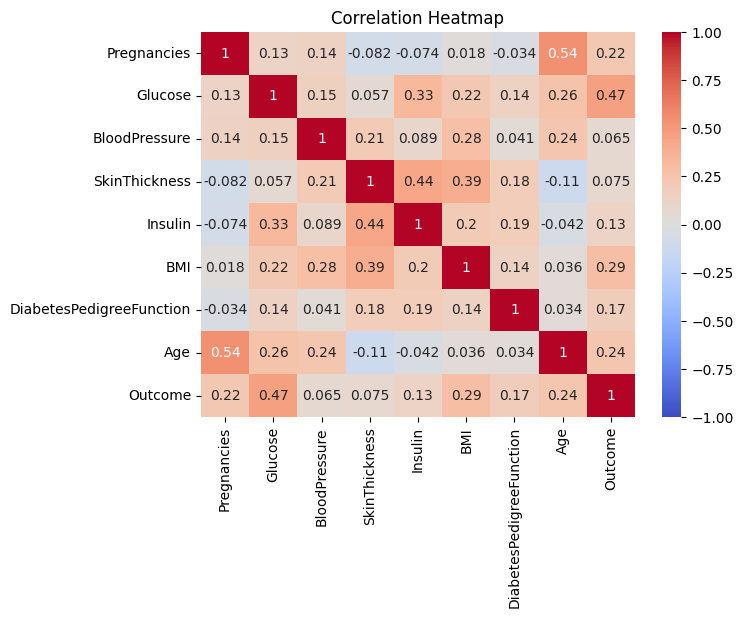

In [ ]:
# Correlation heatmap for the numerical features
plt.figure(figsize=(7, 5))
# Since all columns are numercal columns, using entire dataset correction
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Insights from the correlation matrix**

* `Glucose` level has a strong relationship with `Outcome`. That means higher glucose levels are associated with a higher likelihood of being diabetic
* `Insuline` is positively correlated with `SkinThickness`.As SkinThickness increases, Insulin levels also tend to increase.
* `Insuline` is positively correlated with `Glucose`. As blood glucose levels increase, insulin levels also tend to increase.
* `BMI` (Body Mass Index) shows a positive correlation with diabetes outcome. Individuals with higher BMI are more likely to have diabetes.
* `Age` has strong correlation with `Pregnency`, indicating that older individuals tend to have had more pregnancies.



---



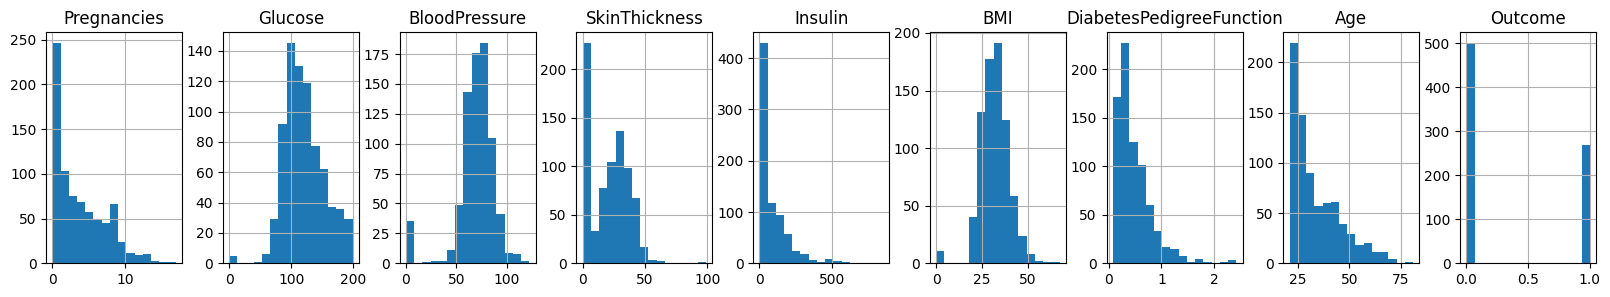

In [ ]:
# Histograms for numerical variables
dataset.hist(bins=15, figsize=(20, 3), layout=(1, 9))
plt.show()

* `Glucose`: Standard range 70 to 140. From the above graph it is mostly between 70 and 150, but tails extend to nearly 200.
* `BloodPressure`: Standard range 80 to 120. From the above graph some entries are close to 0, which may indicate missing or faulty data
* `SkinThickness`: Data is right-skewed (many low values). The large spike near 0 suggests missing data
* `Insulin`: Standard range between 5 and 25. Heavily right-skewed. Many 0 values suggest missing data.
* `BMI`: Healthy persons average range between 18.5 and 24.9. A value near 0 are likely invalid.(Do we need to correct the 0 value data with impute approach?)
* `DiabetesPedigreeFunction`: Data is heavily right-skewed
* `Age`: Strong right-skew (most patients are younger). Most of the patients are between 20 to 30. Younger population dominates. May affect modeling if not stratified or weighted.
* Outcome: Imbalanced classes — more "0"s than "1"s

**Observations:**

* There are zero values in fields: `Glucose`, `BloodPressure`, `BMI`, `Insulin` are invalid, indicating missing data. We need to handle these with imputation.

* Skewed distributions may require log transformations or scaling (StandardScaler or MinMaxScaler).




---



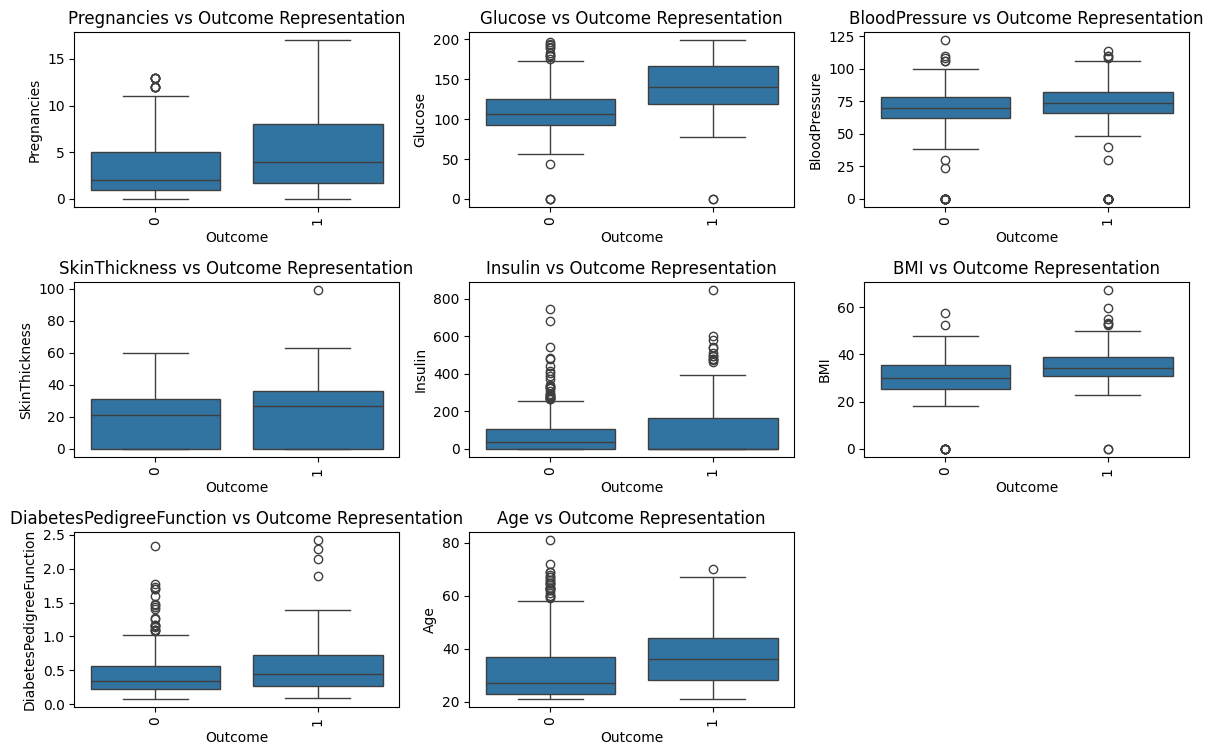

In [ ]:
columns = dataset.iloc[:, :-1]
plt.figure(figsize=(12, len(columns) * 2.5))

for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 3, i)
    sns.boxplot(data=dataset, x='Outcome', y=col)
    plt.xticks(rotation=90)
    plt.xlabel("Outcome")
    plt.ylabel(col)
    plt.title(f"{col} vs Outcome Representation")

plt.tight_layout()
plt.show()

**Observations**:

1. Pregnancies
  * Observation: Median number of pregnancies is higher for those with diabetes (Outcome = 1).

  * Implication: Higher number of pregnancies may be associated with increased diabetes risk.

2. Glucose
  * Observation: Median and overall glucose levels are significantly higher for the diabetic group.

  * Implication: Elevated glucose is a strong indicator of diabetes.

3. Blood Pressure
  * Observation: Slightly higher median blood pressure in the diabetic group

  * Implication: Blood pressure may have a mild association with diabetes.

4. Skin Thickness
  * Observation: Median skin thickness is slightly higher for the diabetic group

  * Implication: Skin thickness may not be a strong standalone predictor.

5. Insulin
  * Observation: Diabetic group tends to have higher insulin levels, but with significant overlap and many outliers.

  * Implication: Insulin levels vary widely but tend to be higher in diabetes.

6. BMI (Body Mass Index)
  * Observation: Median BMI is higher for those with diabetes.

  * Implication: Higher BMI is associated with increased diabetes risk.

7. Diabetes Pedigree Function
  * Observation: Slightly higher median for the diabetic group, but with considerable overlap.

  * Implication: Family history (as measured here) may have some effect, but not a strong one.

8. Age
  * Observation: Diabetic group is generally older.

  * Implication: Age is a risk factor for diabetes.



---






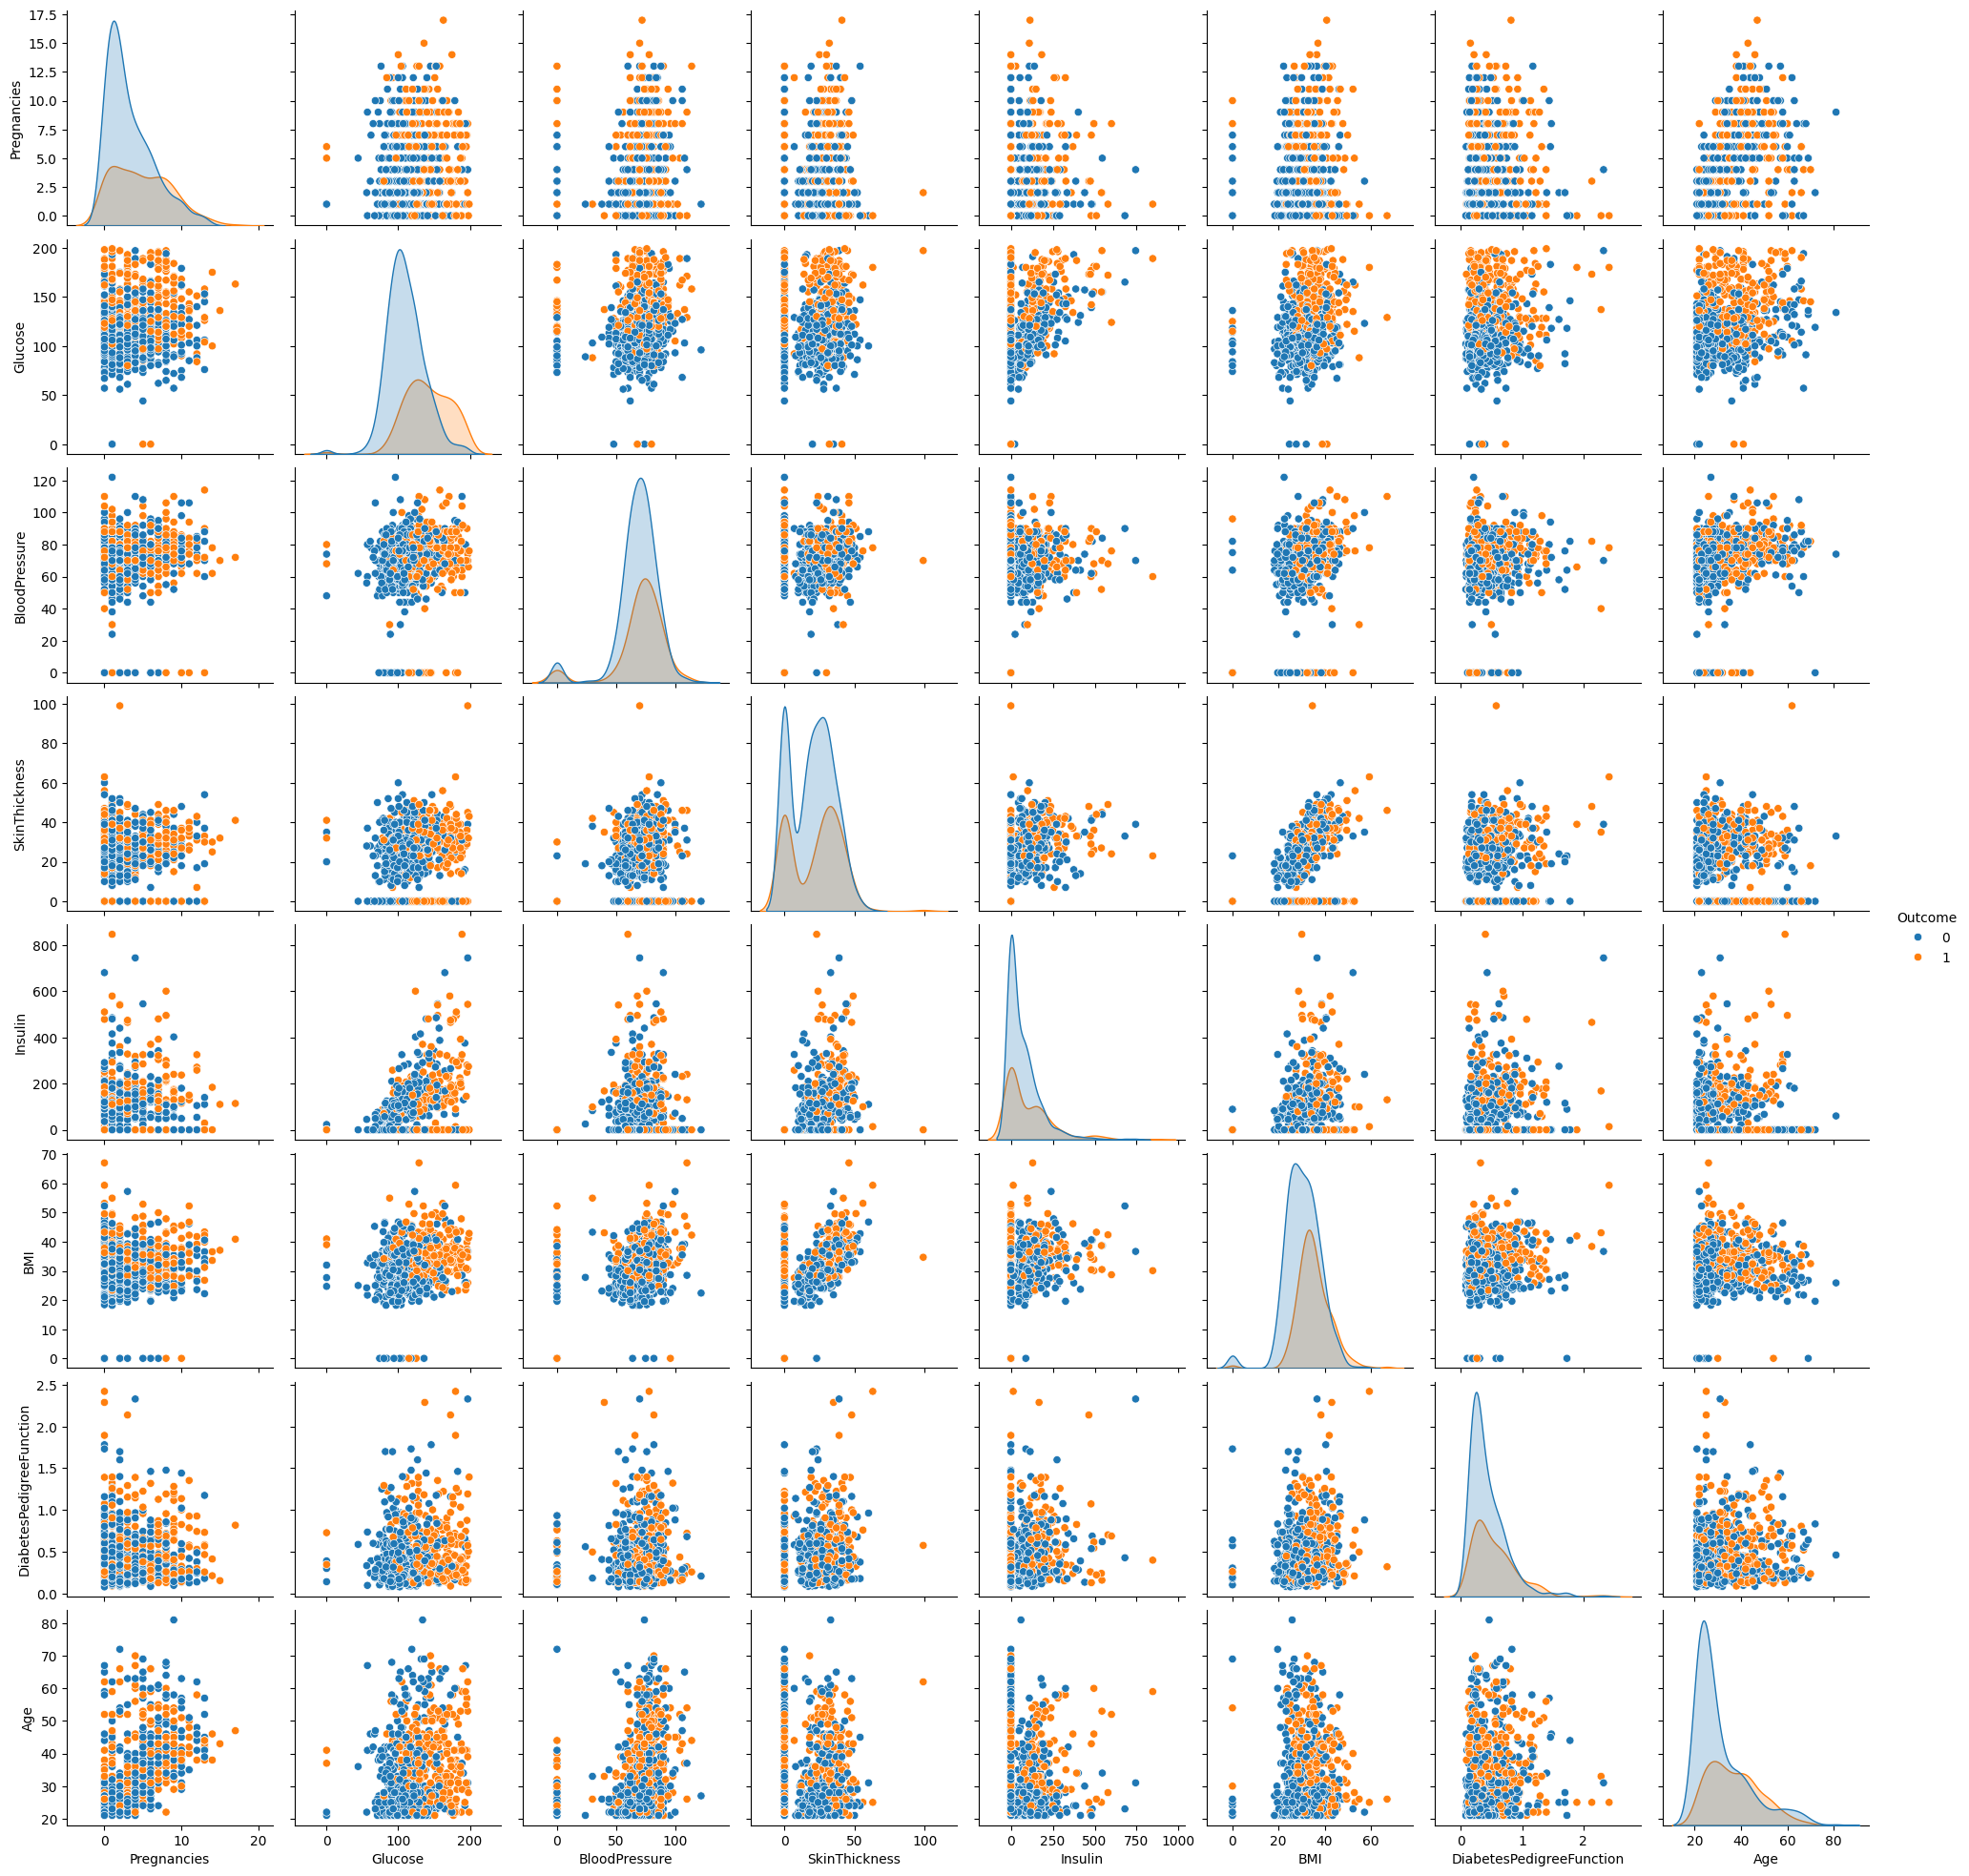

In [ ]:
# Pair plot
sns.pairplot(dataset, hue="Outcome")
plt.show()



---



## **3. Train/Test split**

Spliting data is import step to generalize the model by ensuring that the model learns from the training data and model is used to test the unseen test data set, which helps in avoiding overfitting and providing a reliable measure of performance on new data.

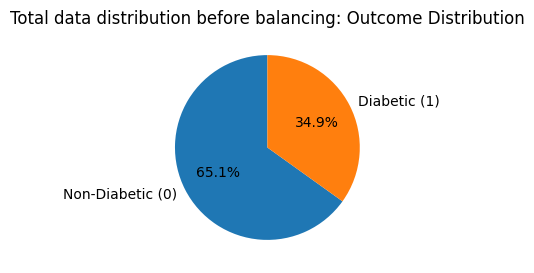

In [ ]:
# Check the data distribution for the Outcome field
labels = ['Non-Diabetic (0)', 'Diabetic (1)']
sizes = dataset['Outcome'].value_counts().sort_index()

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total data distribution before balancing: Outcome Distribution')
plt.show()

This imbalance can bias many models toward the majority class, reducing performance on the minority (positive diabetes) class. We have to balance the dataset so that both Outcome = 0 and Outcome = 1 have comparable representation. One of the option is to use **SMOTE** (Synthetic Minority Oversampling Technique). This approach creates synthetic samples for the minority class by interpolating between existing examples.

In [ ]:

# Remove SkinThickness to prevent overfitting on the training data
dataset.drop('SkinThickness', axis=1, inplace=True)

# Add interaction features to capture combined effects between key variables
dataset['Glucose_BMI'] = dataset['Glucose'] * dataset['BMI']
dataset['Age_Pregnancies'] = dataset['Age'] * dataset['Pregnancies']
dataset['BMI_Age'] = dataset['Age'] * dataset['BMI']
dataset['Glucose_Insulin'] = dataset['Glucose'] * dataset['Insulin']

# Bin Age & BMI into groups
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 30, 40, 100])
dataset['BMIGroup'] = pd.cut(dataset['BMI'], bins=[0,18.5,25,30,40,100])

categorical_cols = ['AgeGroup', 'BMIGroup']
dataset['AgeGroup'] = dataset['AgeGroup'].astype('category').cat.codes
dataset['BMIGroup'] = dataset['BMIGroup'].astype('category').cat.codes


In [ ]:
X = dataset.drop(columns=["Outcome"])
y = dataset["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_BMI,Age_Pregnancies,BMI_Age,Glucose_Insulin,AgeGroup,BMIGroup
0,6,148,72,0,33.6,0.627,50,4972.8,300,1680.0,0,2,3
1,1,85,66,0,26.6,0.351,31,2261.0,31,824.6,0,1,2
2,8,183,64,0,23.3,0.672,32,4263.9,256,745.6,0,1,1
3,1,89,66,94,28.1,0.167,21,2500.9,21,590.1,8366,0,2
4,0,137,40,168,43.1,2.288,33,5904.7,0,1422.3,23016,1,4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (614, 13). Training labels size: (614,)
Test set size: (154, 13). Test labels size: (154,)


In [ ]:
#SMOTE Synthetic data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

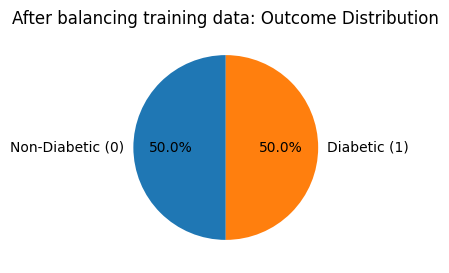

In [ ]:
y_balanced_series = pd.Series(y_train_resampled)

# Count the classes
class_counts = y_balanced_series.value_counts()

# Define labels
labels = ['Non-Diabetic (0)', 'Diabetic (1)']

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('After balancing training data: Outcome Distribution')
plt.show()

## **4. Feature Engineering**


* Zero value columns: Glucose, BloodPressure, BMI, Insulin. 0 values are invliad, indicating missing data. We need to handle these with imputation.

* Skewed columns: Pregnancies, SkinThickness, Insulin DiabetesPedigreeFunction, Age. Skewed distributions require log transformations.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Define column groups
impute_and_scale_cols = ['Glucose', 'BloodPressure', 'BMI']
log_only_cols = ['DiabetesPedigreeFunction', 'Insulin']
categorical_cols = ['AgeGroup', 'BMIGroup']


# Define pipelines
impute_and_scale_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=True))
])

# Combine in ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('impute_and_scale', impute_and_scale_pipeline, impute_and_scale_cols),
    ('log_only', log_pipeline, log_only_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')  # passthrough any other columns

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_and_scale',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Glucose', 'BloodPressure', 'BMI']),
                                ('log_only',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True))]),
                                 ['DiabetesPedigreeFunction', 'Insulin']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['AgeGroup', 'BMIGroup'])])

In [ ]:
columns_with_zeroes = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
X_train_resampled[columns_with_zeroes] = X_train_resampled[columns_with_zeroes].replace(0, np.nan)

# Impute NaNs with median using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_resampled[columns_with_zeroes] = imputer.fit_transform(X_train_resampled[columns_with_zeroes])

# Fit on training data
X_train_processed = preprocessor.fit(X_train_resampled)

# Transform data
X_train_processed = preprocessor.transform(X_train_resampled)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Get all the columns nemrical + categorical
categorical_columns = ['AgeGroup', 'BMIGroup']

# The names of the numerical columns remain unchanged after the transformation
numerical_column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age",
   "Glucose_BMI", "Age_Pregnancies", "BMI_Age", "Glucose_Insulin"
]

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(numerical_column_names) + list(categorical_column_names)
print(all_column_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_BMI', 'Age_Pregnancies', 'BMI_Age', 'Glucose_Insulin', 'AgeGroup_0', 'AgeGroup_1', 'AgeGroup_2', 'BMIGroup_-1', 'BMIGroup_0', 'BMIGroup_1', 'BMIGroup_2', 'BMIGroup_3', 'BMIGroup_4']


## **5. Modeling**

**Baseline models**

A baseline model helps us understand whether our machine learning model is actually learning patterns or just memorizing class imbalances. A random baseline (Dummy with stratified) shows performance without any predictive power, while a dummy majority-class baseline (Dummy with most_frequent) reveals whether the model is just favoring the dominant class. Comparing against these ensures that our model adds real value beyond guessing.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [ ]:
random_baseline = DummyClassifier(strategy='stratified')
random_baseline.fit(X_train_processed, y_train_resampled)
y_random_pred = random_baseline.predict(X_test_processed)

Baseline Accuracy: 0.57
Baseline Precision: 0.42
Baseline Recall: 0.57
Baseline F1 Score: 0.48


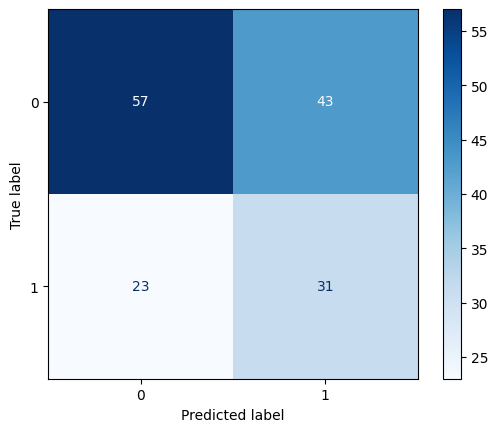

In [ ]:
# Calculate baseline metrics
accuracy_baseline = accuracy_score(y_test, y_random_pred)
precision_baseline = precision_score(y_test, y_random_pred, average='binary', zero_division=0)
recall_baseline = recall_score(y_test, y_random_pred, average='binary', zero_division=0)
f1_baseline = f1_score(y_test, y_random_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_test, y_random_pred)

print(f"Baseline Accuracy: {accuracy_baseline:.2f}")
print(f"Baseline Precision: {precision_baseline:.2f}")
print(f"Baseline Recall: {recall_baseline:.2f}")
print(f"Baseline F1 Score: {f1_baseline:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Lets evaluate following models:
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a dictionary of all models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [ ]:
from sklearn import metrics

# dict to save the results
results = {
    "Model": [],
    "AccuracyTest": [],
    "PrecisionTest": [],
    "RecallTest": [],
    "F1-scoreTest" : [],
    "AccuracyTrain": [],
    "PrecisionTrain": [],
    "RecallTrain": [],
    "F1-scoreTrain" : []
}

# Function to evaluate each model
def evaluate_model(name, model):
    model.fit(X_train_processed, y_train_resampled)  # Train the model
    y_train_pred = model.predict(X_train_processed)  # Predict on train set
    y_test_pred = model.predict(X_test_processed)   # Predict on test set

    # Training values
    accuracy_train = metrics.accuracy_score(y_train_resampled, y_train_pred)
    precision_train = metrics.precision_score(y_train_resampled, y_train_pred)
    recall_train = metrics.recall_score(y_train_resampled, y_train_pred)
    f1_train = metrics.f1_score(y_train_resampled, y_train_pred)

    # Test
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)

    results['Model'].append(name)
    results['AccuracyTest'].append(accuracy_test)
    results['PrecisionTest'].append(precision_test)
    results['RecallTest'].append(recall_test)
    results['F1-scoreTest'].append(f1_test)

    results['AccuracyTrain'].append(accuracy_train)
    results['PrecisionTrain'].append(precision_train)
    results['RecallTrain'].append(recall_train)
    results['F1-scoreTrain'].append(f1_train)

# Loop through all models and evaluate
for name, model in models.items():
    evaluate_model(name, model)

pd.DataFrame(results).sort_values(by=["AccuracyTest", "F1-scoreTest"], ascending=[False, False])

,Model,AccuracyTest,PrecisionTest,RecallTest,F1-scoreTest,AccuracyTrain,PrecisionTrain,RecallTrain,F1-scoreTrain
3,XGBoost,0.785714,0.698113,0.685185,0.691589,1.00000,1.000000,1.0000,1.000000
2,Random Forest,0.720779,0.648649,0.444444,0.527473,1.00000,1.000000,1.0000,1.000000
1,Decision Tree,0.655844,0.512821,0.370370,0.430108,1.00000,1.000000,1.0000,1.000000
0,Logistic Regression,0.610390,0.470000,0.870370,0.610390,0.72125,0.745152,0.6725,0.706965


From the results, there are several key insights can be derived before hyperparameter tuning:
* Overfitting in Tree-Based Models:
    * XGBoost, Random Forest, and Decision Tree models all have perfect training scores (accuracy, precision, recall, F1-score are all 1.0), but their test scores are significantly lower. This indicates strong overfitting: the models have memorized the training data but generalize poorly to new data
* Relative Model Performance:

  * XGBoost currently performs best on the test set (AccuracyTest: 0.79, F1-scoreTest: 0.69), suggesting it is the most promising model out-of-the-box.

  * Random Forest is next (AccuracyTest: 0.74, F1-scoreTest: 0.60).

  * Decision Tree and Logistic Regression perform worse, with Decision Tree notably low on recall and F1-score

* Generalization Gap:
 * The large gap between training and test metrics for tree-based models highlights the need for regularization or tuning to improve generalization. Logistic Regression, by contrast, shows much smaller differences between train and test, indicating less overfitting but also lower overall performance

* Recall vs. Precision Tradeoff:
  * Logistic Regression has the highest recall on the test set (RecallTest: 0.87), but at the cost of lower precision (PrecisionTest: 0.47). This means it catches more positives but also produces more false positives. The other models show more balanced precision and recall, but with lower recall

* Need for Hyperparameter Tuning:
  * The results suggest that hyperparameter tuning is especially necessary for tree-based models to control overfitting and possibly improve test performance. Techniques like limiting tree depth, increasing minimum samples per split, or adding regularization

To evaluate and compare model performance, using 5-fold stratified cross-validation using StratifiedKFold to ensure balanced class distribution across splits. For each model, computed average accuracy, precision, recall, and F1-score using cross_val_score, helping identify the best-performing algorithm based on consistent validation metrics.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy (5-fold CV)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_cv = []

for name, model in models.items():
    print(f"CV for {name} ...")

    # Perform cross-validation and compute metrics for classification
    cv_accuracy_train = cross_val_score(model, X_train_processed, y_train_resampled, scoring="accuracy", cv=cv_strategy, n_jobs=-1)
    cv_precision_train = cross_val_score(model, X_train_processed, y_train_resampled, scoring="precision", cv=cv_strategy, n_jobs=-1)
    cv_recall_train = cross_val_score(model, X_train_processed, y_train_resampled, scoring="recall", cv=cv_strategy, n_jobs=-1)
    cv_f1_train = cross_val_score(model, X_train_processed, y_train_resampled, scoring="f1", cv=cv_strategy, n_jobs=-1)

    # Store results
    results_cv.append({
        "Model": name,
        "CV Accuracy": cv_accuracy_train.mean(),
        "CV Precision": cv_precision_train.mean(),
        "CV Recall": cv_recall_train.mean(),
        "CV F1 Score": cv_f1_train.mean(),
    })

# Convert results to a DataFrame and display
results_cv_df = pd.DataFrame(results_cv).sort_values(by="CV F1 Score", ascending=False)

results_cv_df.head()

CV for Logistic Regression ...
CV for Decision Tree ...
CV for Random Forest ...
CV for XGBoost ...


,Model,CV Accuracy,CV Precision,CV Recall,CV F1 Score
2,Random Forest,0.80000,0.796513,0.8050,0.803709
3,XGBoost,0.78875,0.785218,0.8000,0.790616
1,Decision Tree,0.74500,0.754176,0.7625,0.751906
0,Logistic Regression,0.71500,0.734834,0.6750,0.701070


For medical diagnosis, false negatives (i.e., saying a person doesn’t have diabetes when they do) are more dangerous than false positives. For this problem recall (sensitivity) for class 1 (diabetes) is crucial.

Based on the above values for accuracy and recall : Random Forest is the best model that we can choose for our further analysis.

## **6. Hyperparameter Tuning**

Cross-Fold Validation is a crucial step in the machine learning workflow, especially before fine-tuning a model. It helps ensure that the model generalizes well to unseen data by repeatedly training and validating the model on different subsets of the dataset. Instead of relying on a single train-test split, cross fold validation partitions the data into k folds, using each fold as a validation set while training on the remaining k–1 folds. This process reduces the risk of overfitting to a particular data split and provides a more robust estimate of the model’s true performance. By evaluating model performance across all folds, we gain a better understanding of its variance and stability.

In [ ]:
# Handle class imbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]


# Define hyperparameter grids for classification models
model_param_grids = {
     "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],                 # Regularization strength
        "solver": ["liblinear", "lbfgs"],             # Optimization algorithms
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],             # Splitting criteria
        "max_depth": [5, 7, 9],                       # Limit tree depth
        "min_samples_split": [5, 7],                  # Min samples to split a node
        "min_samples_leaf": [2, 4],                   # Min samples at a leaf node
        "max_features": ["sqrt", "log2"],             # Number of features to consider at each split
        "ccp_alpha": [0.0, 0.001, 0.01]               # Post-pruning complexity parameter
    },
     "XGBoost": {
        "n_estimators": [50],
        "max_depth": [2, 3],
        "learning_rate": [0.01, 0.03],                # Even smaller learning rate
        "subsample": [0.5],                           # More aggressive row sampling
        "colsample_bytree": [0.5],
        "gamma": [1, 5],                              # Increase to reduce splits
        "reg_alpha": [1, 10],                         # More L1
        "reg_lambda": [5, 10],                        # More L2
        "scale_pos_weight": [scale_pos_weight]        # Keep class imbalance handling
    },
     "Random Forest": {
       "n_estimators": [50, 100],                     # Number of trees
        "max_depth": [3, 5],                          # Maximum depth of each tree
        "min_samples_split": [10],                    # Minimum samples required to split an internal node
        "min_samples_leaf": [5, 10],                  # Minimum samples required to be at a leaf node
        "max_features": ['sqrt'],                     # Number of features to consider when looking for the best split
        "bootstrap": [True],                          # Seed for reproducibility
        "random_state": [42],                         # Whether bootstrap samples are used when building trees
    },
}

In [ ]:
best_models = {}
best_params = {}
results_hyperparameter = []
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training Name:{name}")

    search = GridSearchCV(model, param_grid=model_param_grids[name], cv=cv_strategy, scoring='f1', n_jobs=-1)
    search.fit(X_train_processed, y_train_resampled)

    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_

    # Compute performance metrics on train and test sets
    y_train_pred = search.best_estimator_.predict(X_train_processed)
    y_test_pred = search.best_estimator_.predict(X_test_processed)

    # Compute train metrics
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='binary', zero_division=0)

    # Store results
    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

# Store results in a pandas DataFrame and display
results_hyp_df = pd.DataFrame(results_hyperparameter)

Training Name:Logistic Regression
Training Name:Decision Tree
Training Name:Random Forest
Training Name:XGBoost


In [ ]:
results_hyp_df.sort_values(by="Test F1", ascending=False)


,Model,Best Params,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.75500,0.757576,0.7500,0.753769,0.759740,0.616438,0.833333,0.708661
3,XGBoost,"{'colsample_bytree': 0.5, 'gamma': 1, 'learnin...",0.75375,0.676522,0.9725,0.797949,0.707792,0.549451,0.925926,0.689655
2,Random Forest,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.84375,0.823529,0.8750,0.848485,0.740260,0.629630,0.629630,0.629630
1,Decision Tree,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",0.80125,0.828338,0.7600,0.792699,0.733766,0.622642,0.611111,0.616822


In [ ]:
best_model = results_hyp_df.sort_values(by="Test F1", ascending=False).iloc[0]['Model']
best_model

'Logistic Regression'

## **7. Selecting Best Model**


In [ ]:
best_models[best_model].get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
best_model_pred_y_train = best_models[best_model].predict(X_train_processed)
best_model_pred_y_test = best_models[best_model].predict(X_test_processed)

Train set
Accuracy: 0.76
Precision: 0.76
Recall: 0.75
F1 Score: 0.75


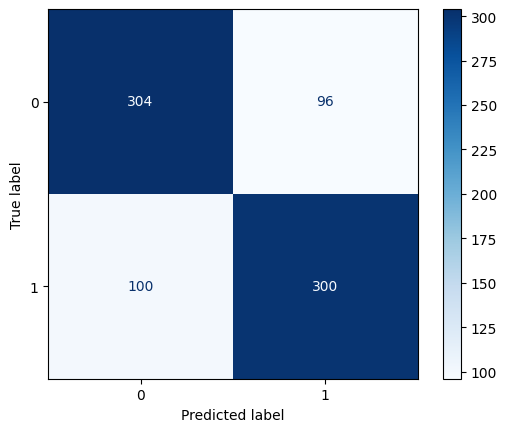

In [ ]:
# Calculate metrics on train set
accuracy_train = accuracy_score(y_train_resampled, best_model_pred_y_train)
precision_train = precision_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
recall_train = recall_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
f1_train = f1_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
cm_train = confusion_matrix(y_train_resampled, best_model_pred_y_train)

print(f"Train set")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Test set
Accuracy: 0.76
Precision: 0.62
Recall: 0.83
F1 Score: 0.71


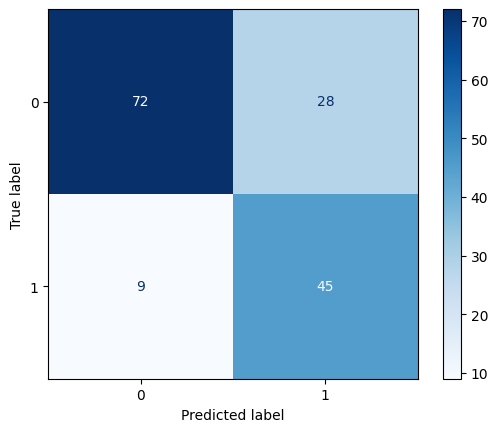

In [ ]:
# Calculate metrics on test set
accuracy_test = accuracy_score(y_test, best_model_pred_y_test)
precision_test = precision_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
recall_test = recall_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
f1_test = f1_score(y_test, best_model_pred_y_test, average='binary', zero_division=0)
cm_test = confusion_matrix(y_test, best_model_pred_y_test)

print(f"Test set")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

## **8. Model interpretation**


In [ ]:
import shap

# Take a random sample of 50 background samples
background = shap.sample(X_train_processed, 50)

# Create a SHAP explainer for the best model
explainer = shap.KernelExplainer(models[best_model].predict, background)

# Calculate the SHAP values for the test samples
shap_values = explainer.shap_values(X_test_processed)

  0%|          | 0/154 [00:00<?, ?it/s]

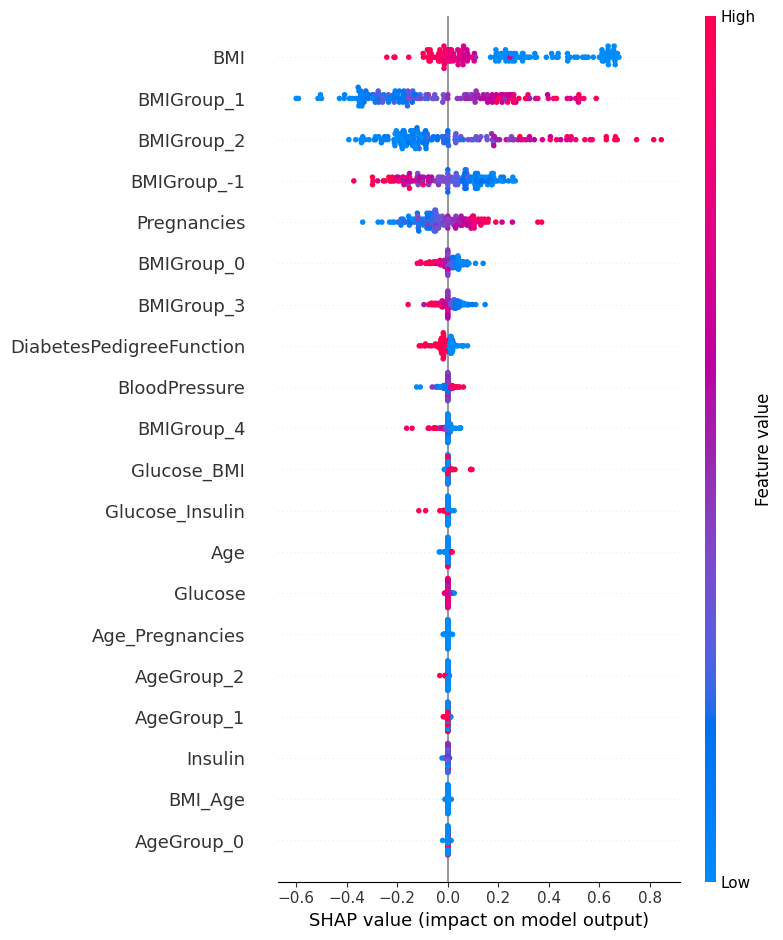

In [ ]:

# Visualize SHAP values
shap.summary_plot(shap_values, X_test_processed, feature_names=all_column_names)

This SHAP (SHapley Additive Explanations) summary plot shows how each feature impacts the model's predictions.



*   x-axis (Impact on Model Output)
  * Negative values decrease the likelihood of diabetes.
  * Positive values increase the likelihood of diabetes.
*   y-axis (Model Features)
  * The order of the features on the Y-axis is based on overall importance.
* Color (Feature Value Intensity)
 * Red → Feature is at its higher range.
 * Blue → Feature is at its lower range.

 From the above graph top 5 influencial factors are:
 * BMI: High BMI values (pink) contribute significantly to a positive SHAP value, pushing the model toward predicting diabetes. Low BMI values (blue) are associated with negative SHAP values, indicating a reduced likelihood of diabetes prediction
 * BMIGroup_1: This likely represents a BMI range (e.g., "overweight" group); being in this group positively impacts the model prediction toward diabetes.
Most data points in this group are higher-valued (pink), contributing positively (rightward) to SHAP value → stronger diabetes prediction.
 * BMIGroup_2: Individuals in this BMI group also tend to have positive SHAP values, indicating elevated diabetes risk.There's less separation in SHAP values compared to BMIGroup_1, but it's still more impactful than lower BMI groups.
 * BMIGroup_-1: This group likely refers to underweight or undefined values; many of its SHAP values are negative, which pulls the prediction away from diabetes.The presence of blue (low value) points with negative SHAP confirms this group tends to reduce predicted diabetes risk.
 * Pregnencies: Higher pregnancy counts (pink) push the SHAP value to the right, indicating increased diabetes risk, especially relevant in gestational diabetes context. Lower values (blue) generally have SHAP values near zero or negative, indicating minimal or reducing impact on diabetes prediction.


## **9. Results**


Main takeaways

* Good Overall Accuracy: The model achieved an accuracy of 76%, indicating it performs well in correctly classifying diabetic and non-diabetic cases in the test dataset.

* High Recall for Diabetic Cases: With a recall of 83%, the model is effective at identifying actual diabetic patients, minimizing the risk of missing true positive cases — which is crucial in healthcare scenarios.

* Precision: The model's precision of 62% suggests that some non-diabetic cases are being falsely predicted as diabetic, which could lead to unnecessary follow-ups but is often acceptable in early screening models where catching true positives is a priority.

* Balanced Performance (F1 Score): An F1 Score of 0.71 shows a good balance between precision and recall, making this model suitable for practical use where both false positives and false negatives have significant impacts.


## **10. Save model**



In [ ]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "best_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_models[best_model], file)

print("Saved successfully!")

Saved successfully!


## **11. Implementation / Testing**

In [ ]:
def add_engineered_features(df):
    df = df.copy()
    df["Age_Pregnancies"] = df["Age"] * df["Pregnancies"]
    df["Glucose_BMI"] = df["Glucose"] * df["BMI"]
    df["Glucose_Insulin"] = df["Glucose"] * df["Insulin"]
    df["BMI_Age"] = df["BMI"] * df["Age"]

    # Create binned columns (example)
    df["BMIGroup"] = pd.cut(df["BMI"], bins=[0, 18.5, 25, 30, 100])
    df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 30, 50, 100])

    return df

In [ ]:
def predict_diabetes(observation):
    """
    Predicts whether a person has diabetes using a trained Logistic Regression model.

    Args:
        observation (dict or pd.DataFrame): A single patient's data as a dictionary or DataFrame row.

    Returns:
        int: Prediction (0 = No Diabetes, 1 = Diabetes)
    """
    with open("best_model.pkl", "rb") as file:
        model = pickle.load(file)

    with open("preprocessor.pkl", "rb") as file:
        preprocessor = pickle.load(file)

    # Convert observation to DataFrame if needed
    if isinstance(observation, dict):
        observation = pd.DataFrame([observation])  # Convert single dictionary to DataFrame

    # added
    observation = add_engineered_features(observation)

    observation_processed = preprocessor.transform(observation)

    observation_processed = pd.DataFrame(observation_processed, columns=all_column_names)

    # Make prediction and get probability scores
    probabilities = model.predict_proba(observation_processed)[0]  # Get probability for both classes
    prediction = model.predict(observation_processed)[0]  # Extract single prediction

    # Get certainty as the probability of the predicted class
    certainty = probabilities[prediction] * 100

    # Compute SHAP values
    explainer = shap.LinearExplainer(model, X_train_processed)
    shap_values = explainer(observation_processed)

    # Generate SHAP plot
    shap.waterfall_plot(shap_values[0])
    plt.show()

    return prediction, certainty

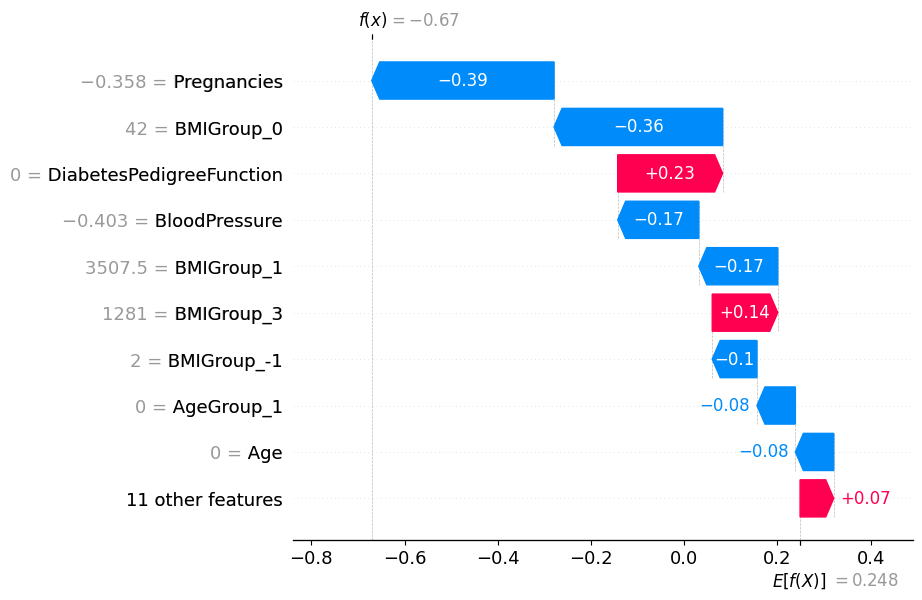

Diabetes Prediction: Not Diabetic
Model Certainty: 66.16%


In [ ]:
# Example input: A single patient's data (dictionary format)
observation = {
    "Pregnancies": 2,
    "Glucose": 115,
    "BloodPressure": 70,
    "Insulin": 100,
    "BMI": 30.5,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 42
}


prediction, certainty = predict_diabetes(observation)

print(f"Diabetes Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
print(f"Model Certainty: {certainty:.2f}%")


**Test result Conclusion**

1.Prediction Outcome and Certainty
 * The model predicts that the patient is not diabetic with a certainty of 66.16%. This means the model is reasonably confident in its prediction, though not with extremely high certainty.

2.Key Negative Contributors (Lower Diabetes Risk)
 * The most significant factors reducing the risk of diabetes for this patient are:
  * Pregnancies: A lower number of pregnancies (-0.39 impact).

  * BMIGroup_0: Belonging to a lower BMI group (-0.36 impact).

  * Blood Pressure: Blood pressure value also contributes negatively (-0.17 impact).

   These negative SHAP values indicate these features push the prediction towards "not diabetic."

3.Key Positive Contributors (Higher Diabetes Risk)
    
  * Some factors slightly increase the diabetes risk:
    * Diabetes Pedigree Function: A moderate value here contributes +0.23 to risk.

   * BMIGroup_3: Higher BMI sub-group adds +0.14.

  These positive SHAP values show these features push the prediction towards "diabetic," but not enough to outweigh the negative contributors.